In [1]:
#!pip install scikit-learn
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

此为本人（吴雪晨）研究生课程“计算统计学与Python”的课后个人作业，目的是对给予的数据集进行PCA降维处理。

In [2]:
df = pd.read_csv('GroupFour.csv')

In [3]:
df = pd.DataFrame(df)
df.head()

,UID,Gender,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,Target
0,C101023,Male,1.533790,-0.462229,0.146431,-0.292243,0.802299,-0.441966,1.223833,0.033237,...,-1.792715,2.528748,0.839728,-0.377187,0.739614,-0.164414,-0.152147,0.658734,-1.077426,265.268953
1,C101024,Male,0.008034,0.040905,1.395295,0.310977,-0.235963,-0.053962,0.035633,-0.558420,...,1.234686,-0.440423,0.508868,1.444795,0.245966,0.229541,0.144230,-0.397733,-1.994450,-131.630948
2,C101025,Female,-0.242679,-1.552317,-0.055159,-0.907410,1.307513,-0.245937,0.147535,2.022354,...,-2.373457,-1.215018,-0.183177,-0.611480,-0.367536,-0.295070,0.260193,-0.320596,0.174748,-163.533074
3,C101026,Female,-0.775502,0.327270,-0.304715,-0.732449,-0.190289,0.381677,-0.094586,1.117680,...,-1.107204,-0.159584,1.297519,0.079642,0.653735,0.135911,-1.597995,-1.428190,-1.364713,14.576142
4,C101027,Male,-0.986914,0.013374,0.006489,-0.693266,-0.834549,-0.047806,-0.522394,0.471200,...,0.614217,0.392699,0.267140,0.918326,1.174748,-0.528708,-0.468721,1.552672,1.324606,-431.304575


In [4]:
#Cleaning the data
df = df.drop('UID',axis = 1)
df['Gender'] = np.where(df.Gender == 'Male', 0, 1)
df.head()

,Gender,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,Target
0,0,1.533790,-0.462229,0.146431,-0.292243,0.802299,-0.441966,1.223833,0.033237,-1.490769,...,-1.792715,2.528748,0.839728,-0.377187,0.739614,-0.164414,-0.152147,0.658734,-1.077426,265.268953
1,0,0.008034,0.040905,1.395295,0.310977,-0.235963,-0.053962,0.035633,-0.558420,-0.741554,...,1.234686,-0.440423,0.508868,1.444795,0.245966,0.229541,0.144230,-0.397733,-1.994450,-131.630948
2,1,-0.242679,-1.552317,-0.055159,-0.907410,1.307513,-0.245937,0.147535,2.022354,0.352795,...,-2.373457,-1.215018,-0.183177,-0.611480,-0.367536,-0.295070,0.260193,-0.320596,0.174748,-163.533074
3,1,-0.775502,0.327270,-0.304715,-0.732449,-0.190289,0.381677,-0.094586,1.117680,0.656680,...,-1.107204,-0.159584,1.297519,0.079642,0.653735,0.135911,-1.597995,-1.428190,-1.364713,14.576142
4,0,-0.986914,0.013374,0.006489,-0.693266,-0.834549,-0.047806,-0.522394,0.471200,0.488597,...,0.614217,0.392699,0.267140,0.918326,1.174748,-0.528708,-0.468721,1.552672,1.324606,-431.304575


In [5]:
X = df.drop(['Target'],axis = 1)
Y = df['Target']
Y.head()

0    265.268953
1   -131.630948
2   -163.533074
3     14.576142
4   -431.304575
Name: Target, dtype: float64

In [6]:
X.corr()
correlation = X.corr()

Text(0.5, 1.0, 'Correlation between fearures')

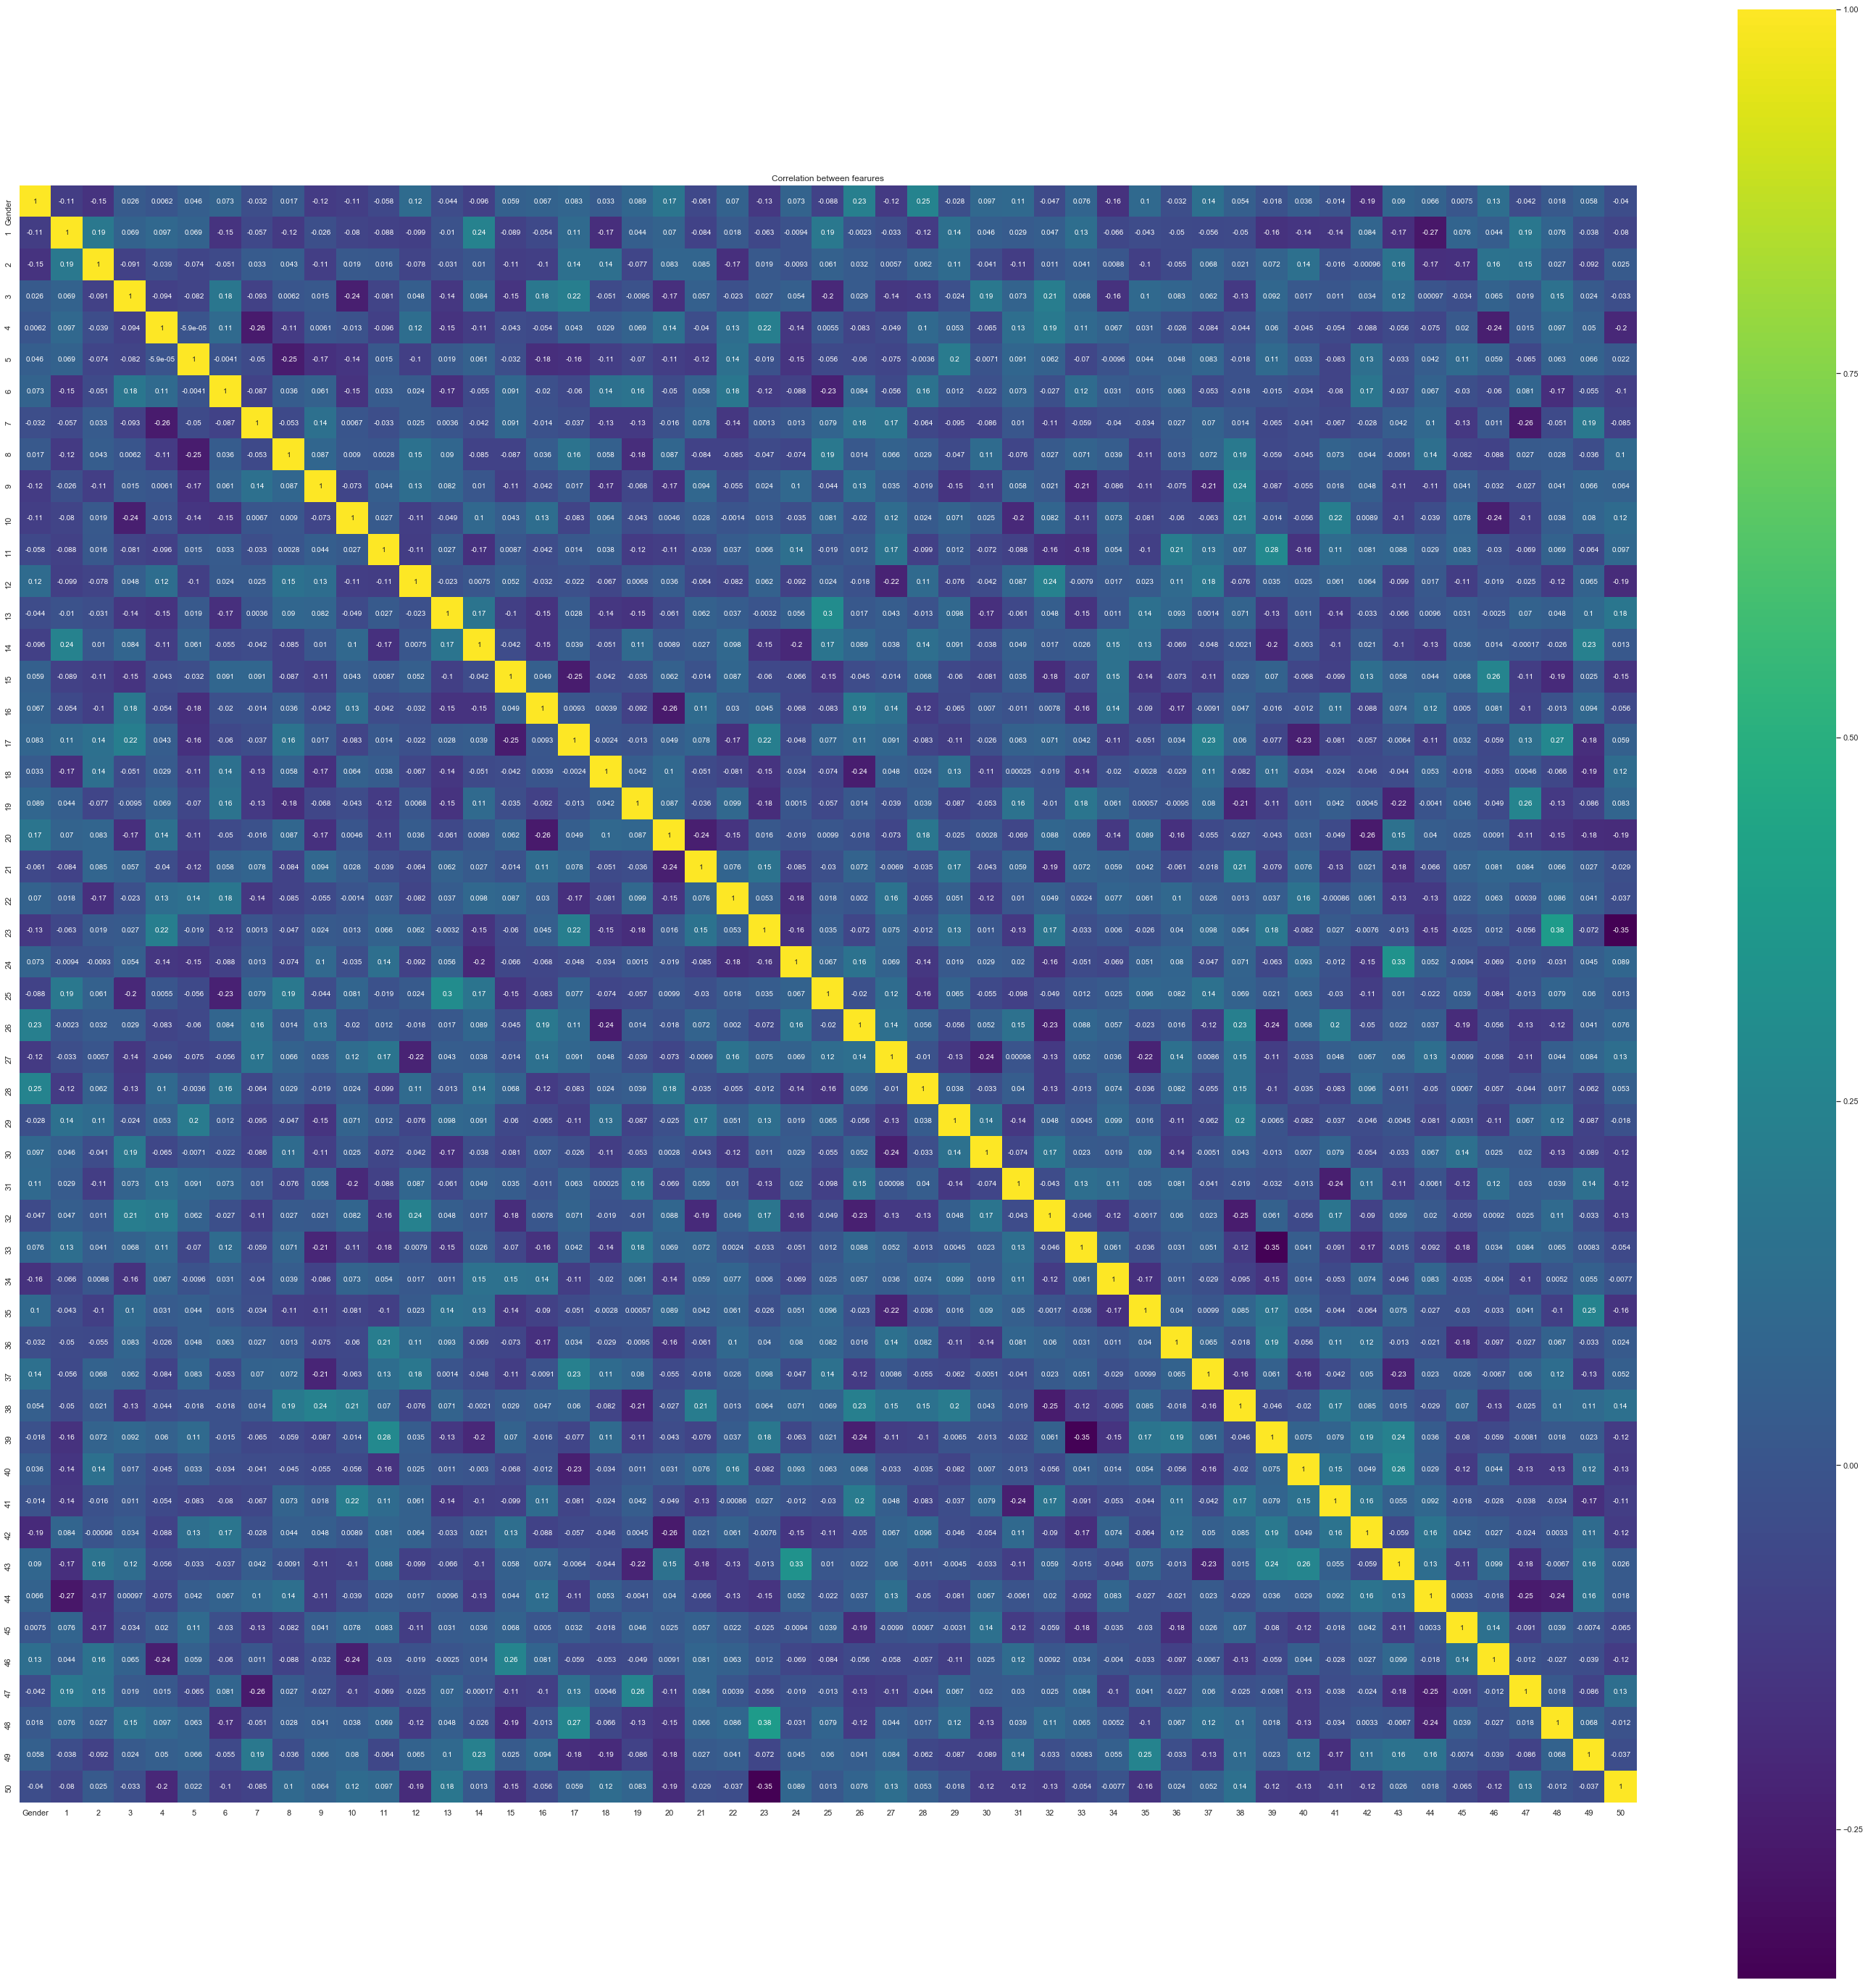

In [7]:
#Get the features' correlation map
plt.figure(figsize=(50,50))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between fearures')

In [8]:
# Scale the data 
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

C:\Users\32832\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.88640526,  1.94180413, -0.37924035, ..., -0.28864617,
         0.65824598, -0.96987582],
       [-0.88640526,  0.06014819,  0.10425222, ...,  0.00980952,
        -0.40360134, -2.03137289],
       [ 1.12815215, -0.24904566, -1.42677575, ...,  0.12658542,
        -0.3260711 ,  0.47957116],
       ...,
       [ 1.12815215,  1.60214152,  0.43959696, ...,  0.30949297,
         1.05843658, -0.04473972],
       [-0.88640526,  2.17346172, -1.03108034, ..., -0.25833023,
        -1.49472975,  0.14486559],
       [-0.88640526, -0.50591595, -1.84966578, ...,  0.20192731,
         0.20888375, -1.21083237]])

In [9]:
#Applying PCA, keep all components
pca = PCA()
pca.fit_transform(X)

array([[ 0.03078287, -0.88811327,  1.36442863, ...,  0.01006917,
        -0.06762131, -0.0498967 ],
       [ 1.84217223, -1.97067939,  4.19338391, ...,  0.25100754,
        -0.40103515, -0.63395197],
       [ 0.43808894,  0.05897979, -0.76323296, ..., -0.042045  ,
        -0.29431733, -0.14919603],
       ...,
       [ 1.30905655,  1.1510621 , -1.36637651, ..., -0.71582499,
         0.69637531,  0.14921259],
       [ 1.11774322,  1.54656932, -1.71883146, ...,  0.21490971,
        -0.07179099, -0.31629669],
       [-0.7697176 , -2.40368706, -0.79673122, ..., -0.12934563,
        -0.93500062,  0.25917308]])

In [10]:
#Get the covariance of the transformed X
pca.get_covariance()

array([[ 1.01010101, -0.11305897, -0.15605134, ...,  0.01832888,
         0.05820852, -0.04029557],
       [-0.11305897,  1.01010101,  0.18866056, ...,  0.07647334,
        -0.03886477, -0.08077986],
       [-0.15605134,  0.18866056,  1.01010101, ...,  0.02712511,
        -0.09278286,  0.02542361],
       ...,
       [ 0.01832888,  0.07647334,  0.02712511, ...,  1.01010101,
         0.06854509, -0.01187881],
       [ 0.05820852, -0.03886477, -0.09278286, ...,  0.06854509,
         1.01010101, -0.03779747],
       [-0.04029557, -0.08077986,  0.02542361, ..., -0.01187881,
        -0.03779747,  1.01010101]])

In [11]:
#Get indivicual feature's explained varience ratio
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.0538026 , 0.05096868, 0.04772833, 0.04409473, 0.04164046,
       0.0411272 , 0.0383369 , 0.03620253, 0.03473792, 0.03397817,
       0.03262993, 0.03082631, 0.02978312, 0.02835474, 0.02655305,
       0.02542585, 0.02480517, 0.02383403, 0.02225344, 0.02106701,
       0.02039727, 0.02008111, 0.01814711, 0.0175088 , 0.01727715,
       0.01598868, 0.01500077, 0.01445006, 0.01398333, 0.01305275,
       0.01271771, 0.01223731, 0.01113295, 0.01029603, 0.01006194,
       0.00891882, 0.00880341, 0.00834794, 0.00746941, 0.00708614,
       0.00671728, 0.00602291, 0.00592101, 0.00540873, 0.00472696,
       0.00452655, 0.00398049, 0.00370157, 0.00333545, 0.0027843 ,
       0.00176589])

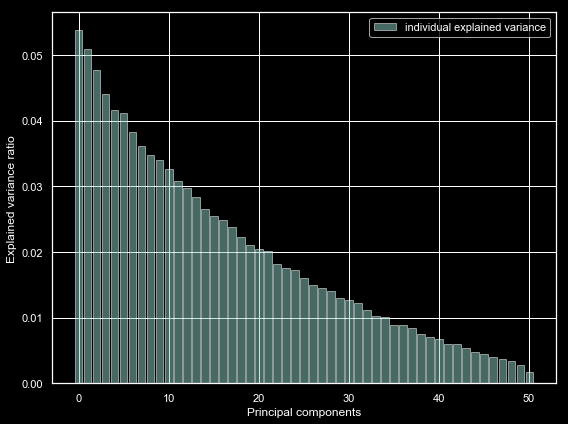

In [12]:
#Visualising the individual explained variance
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(51), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()



In [13]:
pca=PCA(0.9)
X_new=pca.fit_transform(X)
X_new

array([[ 0.03078287, -0.88811327,  1.36442863, ..., -0.17648689,
         0.4275413 ,  1.45635758],
       [ 1.84217223, -1.97067939,  4.19338391, ...,  0.14989888,
         1.05286134, -0.3252383 ],
       [ 0.43808894,  0.05897979, -0.76323296, ...,  0.20418249,
        -0.88923035,  1.53788411],
       ...,
       [ 1.30905655,  1.1510621 , -1.36637651, ...,  0.14250052,
        -0.22658204, -0.89895604],
       [ 1.11774322,  1.54656932, -1.71883146, ..., -0.79402344,
        -0.14502766, -0.17258528],
       [-0.7697176 , -2.40368706, -0.79673122, ..., -1.11798654,
         0.17493852, -0.48952243]])

In [14]:
pca.get_covariance()

array([[ 1.01509139, -0.13180418, -0.13487712, ...,  0.02435516,
         0.04816362, -0.02530166],
       [-0.13180418,  1.03103359,  0.18441755, ...,  0.08081131,
        -0.03316516, -0.08315136],
       [-0.13487712,  0.18441755,  1.01054041, ...,  0.01714755,
        -0.10691716,  0.04209693],
       ...,
       [ 0.02435516,  0.08081131,  0.01714755, ...,  1.00939051,
         0.05959141, -0.00858778],
       [ 0.04816362, -0.03316516, -0.10691716, ...,  0.05959141,
         1.01211788, -0.04325246],
       [-0.02530166, -0.08315136,  0.04209693, ..., -0.00858778,
        -0.04325246,  1.02939206]])

In [15]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.0538026 , 0.05096868, 0.04772833, 0.04409473, 0.04164046,
       0.0411272 , 0.0383369 , 0.03620253, 0.03473792, 0.03397817,
       0.03262993, 0.03082631, 0.02978312, 0.02835474, 0.02655305,
       0.02542585, 0.02480517, 0.02383403, 0.02225344, 0.02106701,
       0.02039727, 0.02008111, 0.01814711, 0.0175088 , 0.01727715,
       0.01598868, 0.01500077, 0.01445006, 0.01398333, 0.01305275,
       0.01271771, 0.01223731, 0.01113295, 0.01029603])

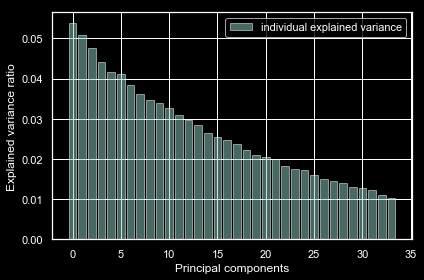

In [16]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(34), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.shape

(80, 51)

In [18]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy.stats import describe

In [19]:
X_new

array([[ 0.03078287, -0.88811327,  1.36442863, ..., -0.17648689,
         0.4275413 ,  1.45635758],
       [ 1.84217223, -1.97067939,  4.19338391, ...,  0.14989888,
         1.05286134, -0.3252383 ],
       [ 0.43808894,  0.05897979, -0.76323296, ...,  0.20418249,
        -0.88923035,  1.53788411],
       ...,
       [ 1.30905655,  1.1510621 , -1.36637651, ...,  0.14250052,
        -0.22658204, -0.89895604],
       [ 1.11774322,  1.54656932, -1.71883146, ..., -0.79402344,
        -0.14502766, -0.17258528],
       [-0.7697176 , -2.40368706, -0.79673122, ..., -1.11798654,
         0.17493852, -0.48952243]])

In [20]:
reg = linear_model.LinearRegression().fit(X_new, Y)

In [21]:
reg.score(X_new, Y)

0.8312692508258223

In [22]:
reg.coef_

array([ -3.91326745,  42.6132914 ,  29.65902251,  24.90629599,
        26.64299323, -12.14575816,  -8.67866149,  10.08236188,
       -29.67922247,  76.87190761,  -2.8398873 , -25.81087717,
        68.27878501,  14.26992262, -20.37761186,  17.27487751,
       -17.65148669, -51.28996088, -36.5643437 ,  16.73372132,
         2.8246229 , -91.88577727,  -8.53814675, -34.23870542,
        86.28420185,  74.53480043, -23.20902725, -88.14650124,
         9.41862789,  40.62197692,  -6.07757362, -51.8744624 ,
        31.70792846,  46.10360235])

In [23]:
reg.intercept_

-43.461698430400006

In [24]:
df_new = pd.DataFrame(X_new)

In [25]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.030783,-0.888113,1.364429,1.781709,-1.244598,5.078769,2.352560,-0.617418,1.775044,0.160059,...,1.025581,-0.630733,0.674568,-0.260675,0.258773,0.924595,0.191927,-0.176487,0.427541,1.456358
1,1.842172,-1.970679,4.193384,-1.580311,0.595749,0.201413,0.822146,-0.945700,0.596199,-1.507290,...,0.444424,-0.283147,0.369417,-0.224039,0.981584,-0.552958,-0.028289,0.149899,1.052861,-0.325238
2,0.438089,0.058980,-0.763233,0.662226,0.657719,0.217145,0.616399,3.258818,-0.209818,-1.930500,...,-1.413068,-0.202834,0.767433,0.575580,0.418585,1.362172,0.029902,0.204182,-0.889230,1.537884
3,-0.156000,-2.016386,0.028566,2.250600,-0.783571,0.034604,1.492327,0.742749,0.842555,-0.713085,...,-0.396782,1.132071,-0.358640,0.614101,0.205183,-1.405272,-0.381456,-1.490835,-1.231689,1.006704
4,-3.131074,-0.915127,-1.344734,0.329612,1.081284,1.250465,0.309209,-0.624294,-1.136852,-1.564018,...,1.129033,0.032377,-0.149349,1.085558,0.594561,-1.336661,-0.089423,0.172312,1.199027,-0.561939


In [26]:
df_new['Target'] = Y

In [27]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Target
0,0.030783,-0.888113,1.364429,1.781709,-1.244598,5.078769,2.352560,-0.617418,1.775044,0.160059,...,-0.630733,0.674568,-0.260675,0.258773,0.924595,0.191927,-0.176487,0.427541,1.456358,265.268953
1,1.842172,-1.970679,4.193384,-1.580311,0.595749,0.201413,0.822146,-0.945700,0.596199,-1.507290,...,-0.283147,0.369417,-0.224039,0.981584,-0.552958,-0.028289,0.149899,1.052861,-0.325238,-131.630948
2,0.438089,0.058980,-0.763233,0.662226,0.657719,0.217145,0.616399,3.258818,-0.209818,-1.930500,...,-0.202834,0.767433,0.575580,0.418585,1.362172,0.029902,0.204182,-0.889230,1.537884,-163.533074
3,-0.156000,-2.016386,0.028566,2.250600,-0.783571,0.034604,1.492327,0.742749,0.842555,-0.713085,...,1.132071,-0.358640,0.614101,0.205183,-1.405272,-0.381456,-1.490835,-1.231689,1.006704,14.576142
4,-3.131074,-0.915127,-1.344734,0.329612,1.081284,1.250465,0.309209,-0.624294,-1.136852,-1.564018,...,0.032377,-0.149349,1.085558,0.594561,-1.336661,-0.089423,0.172312,1.199027,-0.561939,-431.304575


In [28]:
correlation_matrix = df_new.corr().round(1)

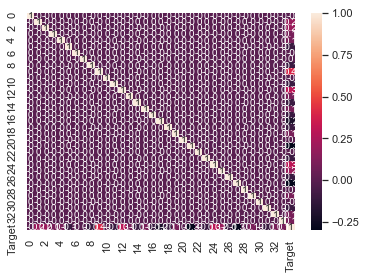

In [29]:
sns.heatmap(data=correlation_matrix, annot=True)

In [30]:
df_new = df_new.drop(['Target'], axis=1)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.030783,-0.888113,1.364429,1.781709,-1.244598,5.078769,2.352560,-0.617418,1.775044,0.160059,...,1.025581,-0.630733,0.674568,-0.260675,0.258773,0.924595,0.191927,-0.176487,0.427541,1.456358
1,1.842172,-1.970679,4.193384,-1.580311,0.595749,0.201413,0.822146,-0.945700,0.596199,-1.507290,...,0.444424,-0.283147,0.369417,-0.224039,0.981584,-0.552958,-0.028289,0.149899,1.052861,-0.325238
2,0.438089,0.058980,-0.763233,0.662226,0.657719,0.217145,0.616399,3.258818,-0.209818,-1.930500,...,-1.413068,-0.202834,0.767433,0.575580,0.418585,1.362172,0.029902,0.204182,-0.889230,1.537884
3,-0.156000,-2.016386,0.028566,2.250600,-0.783571,0.034604,1.492327,0.742749,0.842555,-0.713085,...,-0.396782,1.132071,-0.358640,0.614101,0.205183,-1.405272,-0.381456,-1.490835,-1.231689,1.006704
4,-3.131074,-0.915127,-1.344734,0.329612,1.081284,1.250465,0.309209,-0.624294,-1.136852,-1.564018,...,1.129033,0.032377,-0.149349,1.085558,0.594561,-1.336661,-0.089423,0.172312,1.199027,-0.561939


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(df_new, Y, test_size = 0.2, random_state=5)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80, 34)
(20, 34)
(80,)
(20,)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()

In [34]:
# fit the model to the training data
lin_model_fit = lin_model.fit(X_train, Y_train)
lin_model_fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# print the alpha value of the model (intercept)
print(lin_model_fit.intercept_)

-46.41710588685511


In [36]:
# print the beta values of the model (co-efficients)
betas = lin_model_fit.coef_
counter = 0
for col in df_new.columns:
    if counter == 0:
        print("Beta weights/co-efficients (unregularised)")
        print("-----------------------------------------")
    print(col , ": " , str(round(betas[counter], 4)))
    counter +=1

Beta weights/co-efficients (unregularised)
-----------------------------------------
0 :  -8.3255
1 :  48.6977
2 :  32.3145
3 :  29.7048
4 :  36.5827
5 :  -5.6731
6 :  -9.9875
7 :  7.8995
8 :  -27.9628
9 :  77.1835
10 :  -4.0969
11 :  -17.3128
12 :  74.4895
13 :  15.731
14 :  -18.6401
15 :  7.3987
16 :  -20.57
17 :  -59.1558
18 :  -45.1619
19 :  14.2355
20 :  13.2467
21 :  -99.351
22 :  7.2128
23 :  -46.435
24 :  95.5944
25 :  70.6311
26 :  -30.6547
27 :  -81.6419
28 :  16.6616
29 :  35.4633
30 :  -7.9112
31 :  -50.0623
32 :  34.8026
33 :  54.9529


In [37]:
# predict the training data
df_new_predict = lin_model_fit.predict(X_train)

In [38]:
# calculate RMSE (root mean square error) and R^2 (predictive power)
# training set
rmse = (np.sqrt(mean_squared_error(Y_train, df_new_predict)))
r2 = r2_score(Y_train, df_new_predict)

In [39]:
# print the performance metrics
print("Training performance (unregularised)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Training performance (unregularised)
--------------------------------------
RMSE is 122.7889739143064
R2 score is 0.8257124701743921




In [40]:
# predict the test set
df_new_predict_test = lin_model_fit.predict(X_test)

In [41]:
# calculate RMSE (root mean square error) and R^2 (predictive power)
# testing set
rmse = (np.sqrt(mean_squared_error(Y_test, df_new_predict_test)))
r2 = r2_score(Y_test, df_new_predict_test)

In [42]:
print("Testing performance (unregularised)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Testing performance (unregularised)
--------------------------------------
RMSE is 135.83675827651743
R2 score is 0.7226600408355828




In [43]:
# print the coefficients again
betas = lin_model_fit.coef_

counter = 0
for col in df_new.columns:
    if counter == 0:
        print("Beta weights/co-efficients (unregularised)")
        print("-----------------------------------------")
    print(col , ": " , str(round(betas[counter], 4)))
    counter +=1

Beta weights/co-efficients (unregularised)
-----------------------------------------
0 :  -8.3255
1 :  48.6977
2 :  32.3145
3 :  29.7048
4 :  36.5827
5 :  -5.6731
6 :  -9.9875
7 :  7.8995
8 :  -27.9628
9 :  77.1835
10 :  -4.0969
11 :  -17.3128
12 :  74.4895
13 :  15.731
14 :  -18.6401
15 :  7.3987
16 :  -20.57
17 :  -59.1558
18 :  -45.1619
19 :  14.2355
20 :  13.2467
21 :  -99.351
22 :  7.2128
23 :  -46.435
24 :  95.5944
25 :  70.6311
26 :  -30.6547
27 :  -81.6419
28 :  16.6616
29 :  35.4633
30 :  -7.9112
31 :  -50.0623
32 :  34.8026
33 :  54.9529


In [44]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# fit a L1 model - alpha is a value between 0 and inf where higher
# means more regularisation. Typically we use max = 1
lasso_model = Lasso(alpha = 0.5)

# fit the model to the training data
lasso_model_fit = lasso_model.fit(df_new, Y)

# predict the training data
df_new_predict_lasso = lasso_model_fit.predict(X_train)

In [45]:
# calculate RMSE (root mean square error) and R^2 (predictive power)
# training set
rmse = (np.sqrt(mean_squared_error(Y_train, df_new_predict_lasso)))
r2 = r2_score(Y_train, df_new_predict_lasso)


In [46]:
# print the performance metrics
print("Training performance (L1 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Training performance (L1 regularisation)
--------------------------------------
RMSE is 127.02185989326873
R2 score is 0.8134889747776155




In [47]:
# predict the testing data
df_new_predict_lasso_test = lasso_model_fit.predict(X_test)


In [48]:
# calculate RMSE (root mean square error) and R^2 (predictive power)
# testing set
rmse = (np.sqrt(mean_squared_error(Y_test, df_new_predict_lasso_test)))
r2 = r2_score(Y_test, df_new_predict_lasso_test)

In [49]:
# print the performance metrics
print("Testing performance (L1 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Testing performance (L1 regularisation)
--------------------------------------
RMSE is 71.54803802541217
R2 score is 0.923056260705442




In [50]:
# print the coefficients
betas = lasso_model_fit.coef_
counter = 0
for col in df_new.columns:
    if counter == 0:
        print("Beta weights/co-efficients (L1 regularisation)")
        print("-----------------------------------------")
    print(col , ": " , str(round(betas[counter], 4)))
    counter +=1

Beta weights/co-efficients (L1 regularisation)
-----------------------------------------
0 :  -3.731
1 :  42.4209
2 :  29.4536
3 :  24.684
4 :  26.4076
5 :  -11.9074
6 :  -8.4229
7 :  9.8116
8 :  -29.397
9 :  76.5834
10 :  -2.5394
11 :  -25.4928
12 :  67.9496
13 :  13.9242
14 :  -20.0084
15 :  16.8893
16 :  -17.2562
17 :  -50.8786
18 :  -36.1238
19 :  16.2684
20 :  2.344
21 :  -91.3976
22 :  -7.9979
23 :  -33.6788
24 :  85.7168
25 :  73.9216
26 :  -22.5555
27 :  -87.468
28 :  8.7175
29 :  39.8709
30 :  -5.3067
31 :  -51.0733
32 :  30.8273
33 :  45.1514


In [53]:
ridge_model = Ridge(alpha = 0.5)

ridge_model_fit = ridge_model.fit(df_new, Y)

df_new_predict = ridge_model_fit.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, df_new_predict)))
r2 = r2_score(Y_train, df_new_predict)

In [54]:
print("Training performance (L2 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Training performance (L2 regularisation)
--------------------------------------
RMSE is 126.93202425390233
R2 score is 0.8137526996537172




In [55]:
df_new_predict_test = ridge_model_fit.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, df_new_predict_test)))
r2 = r2_score(Y_test, df_new_predict_test)

In [56]:
print("Testing performance (L2 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Testing performance (L2 regularisation)
--------------------------------------
RMSE is 71.96661704617229
R2 score is 0.9221533359937993




In [57]:
betas = ridge_model_fit.coef_

counter = 0
for col in df_new.columns:
    if counter == 0:
        print("Beta weights/co-efficients (L2 regularisation)")
        print("-----------------------------------------")
    print(col , ": " , str(round(betas[counter], 4)))
    counter +=1
print("\n")

Beta weights/co-efficients (L2 regularisation)
-----------------------------------------
0 :  -3.9061
1 :  42.5315
2 :  29.5982
3 :  24.851
4 :  26.5804
5 :  -12.1169
6 :  -8.6565
7 :  10.0551
8 :  -29.5957
9 :  76.6507
10 :  -2.8314
11 :  -25.729
12 :  68.0548
13 :  14.2208
14 :  -20.3027
15 :  17.2085
16 :  -17.582
17 :  -51.0798
18 :  -36.404
19 :  16.6562
20 :  2.8111
21 :  -91.4394
22 :  -8.4923
23 :  -34.0481
24 :  85.7973
25 :  74.0806
26 :  -23.0583
27 :  -87.5525
28 :  9.3531
29 :  40.3191
30 :  -6.0311
31 :  -51.4622
32 :  31.4311
33 :  45.6687




In [58]:
elastic_model = ElasticNet(alpha = 0.5, l1_ratio=0.5)

elastic_model_fit = elastic_model.fit(df_new, Y)

df_new_predict = elastic_model_fit.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, df_new_predict)))
r2 = r2_score(Y_train, df_new_predict)


In [59]:
print("Training performance (ElasticNet regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Training performance (ElasticNet regularisation)
--------------------------------------
RMSE is 137.88997430324417
R2 score is 0.7802074560932889




In [60]:
df_new_predict_test = elastic_model_fit.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, df_new_predict_test)))
r2 = r2_score(Y_test, df_new_predict_test)

In [61]:
print("Testing performance (ElasticNet regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


Testing performance (ElasticNet regularisation)
--------------------------------------
RMSE is 76.79257717993016
R2 score is 0.9113627413761174




In [62]:
betas = elastic_model_fit.coef_

counter = 0
for col in df_new.columns:
    if counter == 0:
        print("Beta weights/co-efficients (ElasticNet regularisation)")
        print("-----------------------------------------")
    print(col , ": " , str(round(betas[counter], 4)))
    counter +=1
print("\n")

Beta weights/co-efficients (ElasticNet regularisation)
-----------------------------------------
0 :  -3.503
1 :  38.7868
2 :  26.8035
3 :  22.3145
4 :  23.7316
5 :  -10.7458
6 :  -7.5814
7 :  8.7607
8 :  -25.8854
9 :  67.0539
10 :  -2.3384
11 :  -22.1324
12 :  58.4878
13 :  12.0192
14 :  -17.0461
15 :  14.3211
16 :  -14.5738
17 :  -42.37
18 :  -29.7834
19 :  13.3863
20 :  2.0836
21 :  -73.6605
22 :  -6.5096
23 :  -26.5309
24 :  66.9929
25 :  56.8107
26 :  -17.2464
27 :  -65.5653
28 :  6.7143
29 :  29.2584
30 :  -4.1085
31 :  -36.752
32 :  21.7089
33 :  30.9108


